In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import colorsys
import random
from scipy.interpolate import interpolate

In [2]:
def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    # Perform the rotation
    M = cv.getRotationMatrix2D(center, angle, scale)
    rotated = cv.warpAffine(image, M, (w, h))

    return rotated

In [3]:
def scale_image(image,fx,fy):
    (w,h)= image.shape[0:2]
    dim = (fx*w,fy*h)
    resized = cv.resize(image, dim, interpolation = cv.INTER_AREA)
    return resized

In [4]:
def connected_component_label(img,scale,fx,fy,rot,angle):
    
    # Getting the input image
    # Converting those pixels with values 1-127 to 0 and others to 1
    img = cv.threshold(img, 127, 255, cv.THRESH_BINARY)[1]
    im_old = np.copy(img)
    # Applying cv2.connectedComponents() 
    if(scale==1):
        img = scale_image(img,fx,fy)
    if(rot==1):
        img = rotate(img,angle)
    num_labels, labels = cv.connectedComponents(img)
    num_labels_old, labels_old = cv.connectedComponents(im_old)
    print(num_labels)
    print(num_labels_old)
    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])

    # Converting cvt to BGR
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    
    # Showing Original Image
    plt.figure(figsize=(12,8))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Orginal Image")
    plt.show()
    
#     plt.figure(figsize=(12,8))
#     plt.imshow(cv.cvtColor(im_old, cv.COLOR_BGR2RGB))
#     plt.axis("off")
#     plt.title("Orginal Segmented Image")
#     plt.show()
    
    #Showing Image after Component Labeling
    plt.figure(figsize=(12,8))
    plt.imshow(cv.cvtColor(labeled_img, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Image after Component Labeling")
    plt.show()

Text(0.5, 1.0, 'Original Image')

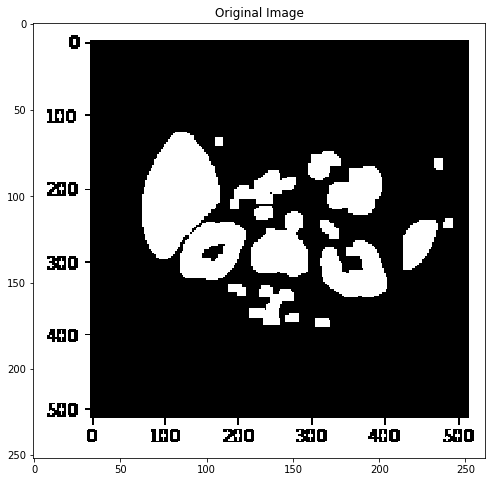

In [5]:
image1=cv.imread('../images/liver.png',0)
plt.figure(figsize=(12,8))
plt.imshow(image1,cmap="gray")
plt.title("Original Image")

## Part 1

## UpScaling the Label Map

46
46


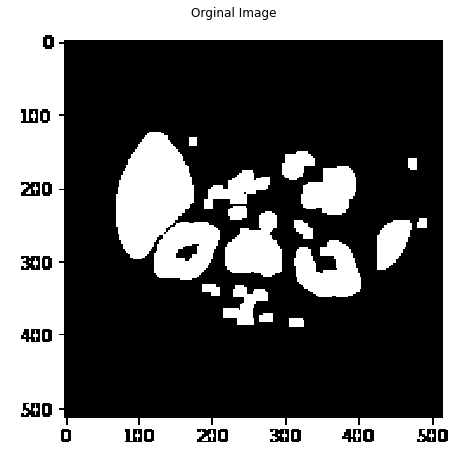

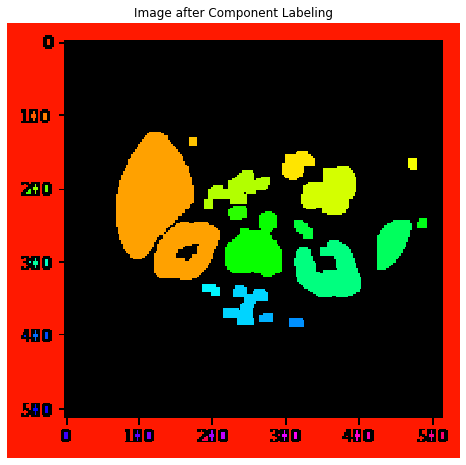

In [6]:
connected_component_label(image1,0,0,0,0,0)

46
46


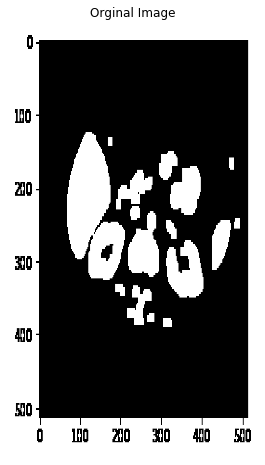

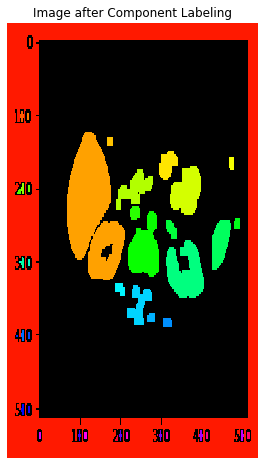

In [7]:
connected_component_label(image1,1,3,5,0,0)

## Observations: -

1. As shown in the above image, number of segments does not change while we upscale the image.
2. If we scale the label map, the segmented image will also be upscaled as shown above. 
3. This is because, if we upscale the image, the number of segments also will grow in the same proportion and some of the indices where interpolation is required, the same interpolation is done on label map , hence the segmented image will also be upscaled with same number of segments.

## Part 2

## Rotating the Label Map

46
46


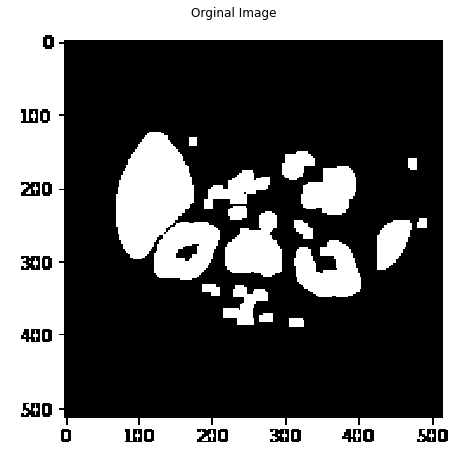

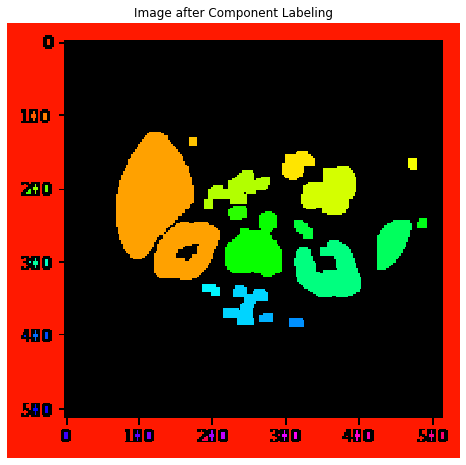

In [8]:
connected_component_label(image1,0,0,0,0,0)

20
46


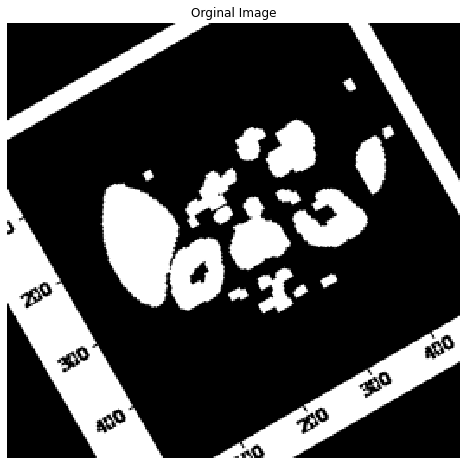

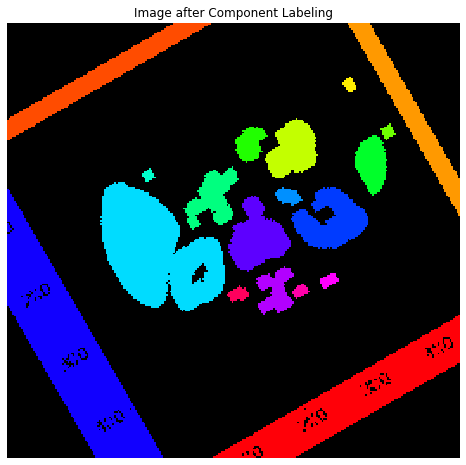

In [9]:
connected_component_label(image1,0,0,0,1,30)

## Observations.

### Without Cropping
1. Without cropping the content in the desired region will be rotated with same number of segments.
2. Small catch here is, when the border also gets rotated, then it gets changed to different segments as shown in the figure above and above above.
3. But if we concentrate on ROI, then the segmented image also gets rotated by same angle with same number of segments as original segmented image. 

### With Cropping
1. With Cropping, the ROI gets cropped hence the number of segments vary depending on the output size, the segmented image will shift but not with same number of segments as original segmented image
2. That is segments may vary for ROI